In [ ]:
import pandas as pd
import numpy as np
import spacy
nlp=spacy.load('en_core_web_sm')
from wordcloud import wordcloud,STOPWORDS
import string
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from deep_translator import GoogleTranslator

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
df = pd.read_csv("P543.csv",on_bad_lines='skip',encoding='latin-1')

In [ ]:
# Combine title and body into one text column
df['text'] = df['title'] + " " + df['body']

In [ ]:
#intilaize tools
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) - {'not', 'no', 'nor', 'never'}
lemmatizer= WordNetLemmatizer()

In [ ]:
#So it removes:
#Emojis (😊, 🤔, etc.)
#Numbers (123)
#Special characters (!, @, #, etc.)
#Punctuation (., ?, etc.)
#Non-English characters
# Define a function to clean and preprocess text
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Lowercase
    tokens = word_tokenize(text)  # Properly tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [ ]:
df['cleaned_text'] = df['text'].apply(clean_text)


In [ ]:
# Create an empty list to store sentences and their ratings
sentence_data = []

In [ ]:
#Iterate through the original DataFrame
for index, row in df.iterrows():
  rating = row['rating']  # Get the rating for the current document
  text = row['cleaned_text'] # Get the cleaned text for the current document
  sentences = sent_tokenize(text) # Tokenize the text into sentences
  # For each sentence in the document, append it and its rating to the list
  for sent in sentences:
    sentence_data.append({'text': sent, 'rating': rating})


In [ ]:
#Create the DataFrame from the list of dictionaries
sent_df = pd.DataFrame(sentence_data)


In [ ]:
def label_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

In [ ]:
sent_df['sentiment'] = sent_df['rating'].apply(label_sentiment)

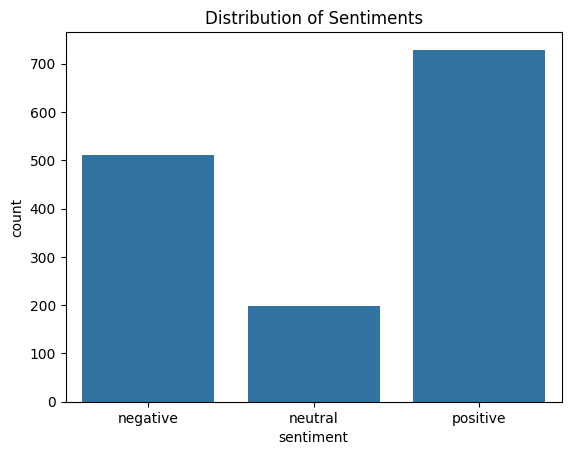

In [ ]:
sns.countplot(data=sent_df, x='sentiment')
plt.title("Distribution of Sentiments")
plt.show()

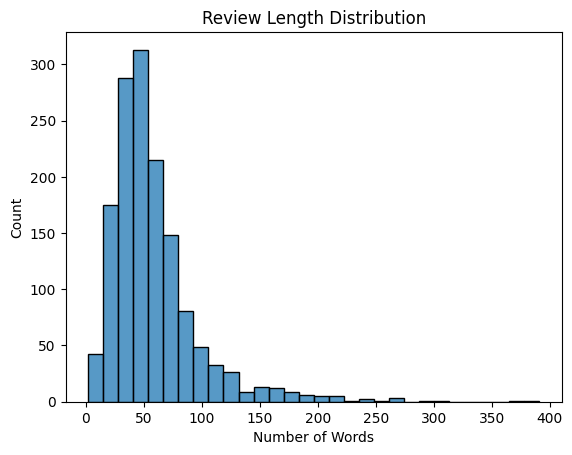

In [ ]:
df['review_length'] = df['text'].apply(lambda x: len(x.split()))
sns.histplot(df['review_length'], bins=30)
plt.title("Review Length Distribution")
plt.xlabel("Number of Words")
plt.show()

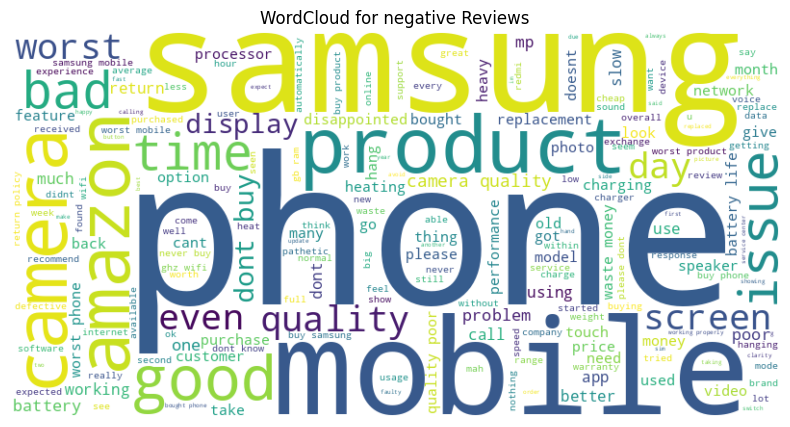

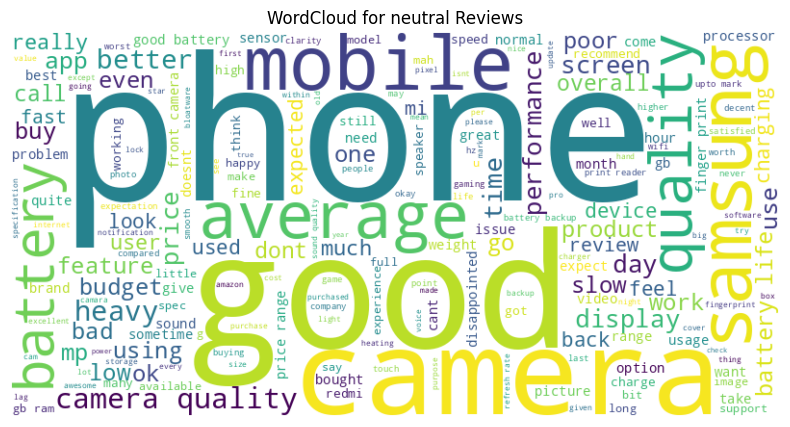

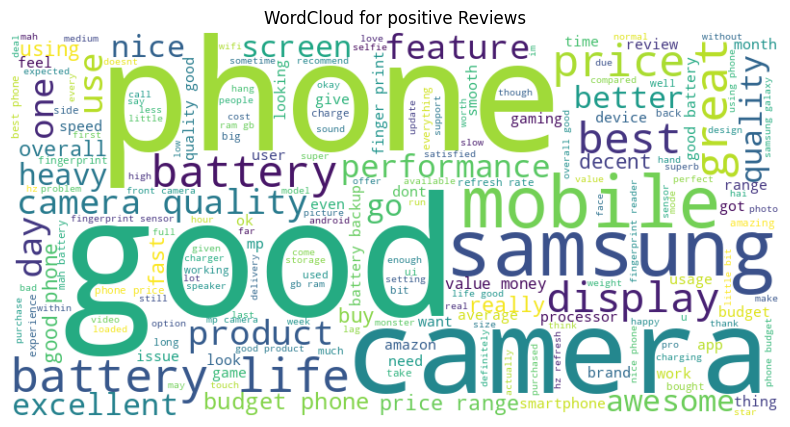

In [ ]:
from wordcloud import WordCloud

for sentiment in sent_df['sentiment'].unique():
    text = " ".join(sent_df[sent_df['sentiment'] == sentiment]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {sentiment} Reviews')
    plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [55]:
x_train, x_test, y_train, y_test = train_test_split(sent_df['text'], sent_df['sentiment'], test_size=0.1, random_state=42)

In [56]:
from sklearn.linear_model import LogisticRegression
lr = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer(ngram_range=(1,2),stop_words=None,lowercase=True)),
    ('linearregression', LogisticRegression())])

In [57]:
lr.fit(x_train, y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('linearregression', LogisticRegression())])

In [58]:
y_pred = lr.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.92      0.84      0.88        57
     neutral       0.00      0.00      0.00        18
    positive       0.74      0.99      0.84        69

    accuracy                           0.81       144
   macro avg       0.55      0.61      0.58       144
weighted avg       0.72      0.81      0.75       144



In [59]:
accuracy_score(y_test,y_pred)

0.8055555555555556

In [62]:
prediction = model.predict(["camera quality like megapixel camera quality low"])[0]
prediction

'neutral'

In [63]:
import pickle
file='lr_pipeline.pkl'

In [64]:
pickle.dump(model,open(file,'wb'))